## IA376I – Tópicos em Engenharia de Computação VII
### Tópico: Análise de Dados Visual (Visual Analytics)
**Professora:** Wu, Shin - Ting<br>
**Aluno:** Luiz Roberto Albano Junior **RA:** 272746<br>

---

### Participação 6

**Exercícios 7.8 (Probabilidade)**

---

#### 1. Faça os learning checks LC7.1 – LC7.7 propostos em [34] (Chester Ismay and Albert Y. Kim. Statistical Inference via Data Science: A ModernDive into R and the Tidyverse: A ModernDive into R and the Tidyverse. Chapman & Hall/CRC The R Series, 2020.).

**(LC7.1) Why was it important to mix the bowl before we sampled the balls?**<br>
A mistura das bolas na tigela é necessária para não haver contaminação ou vício na coletas das próximas amostras, ou seja, garantir que as amostras sejam de fato aleatórias.

**(LC7.2) Why is it that our 33 groups of friends did not all have the same numbers of balls that were red out of 50, and hence different proportions red?**<br>
Por conta da maneira como as bolas são arranjadas, não é possível garantir que possuam a mesma distribuição das porções. Com isso cada coleta de amostras pode conter diferentes composições de cores (aleatoriedade). Coletar aletóriamente porções de bolas faz com que o percentual de bolas vermelhas sejam diferentes, garantindo a variação amostral. A partir dela conseguimos determinar a proporção que mais se repete como um valor mais aceitável da quantidade de bolas vermelhas.

**(LC7.3) Why couldn’t we study the effects of sampling variation when we used the virtual shovel only once? Why did we need to take more than one virtual sample (in our case 33 virtual samples)?**<br>
Por que precisamos coletar diferentes amostras para poder obter a variação amostral. Coletando uma única vez obtermos apenas uma amostra da população.

**(LC7.4) Why did we not take 1000 “tactile” samples of 50 balls by hand?**<br>
Por que seria um trabalho muito árduo e demorado a ser realizado, por conta da quantidade de repetições a serem realizadas. Já com o auxílio de computadores, podemos automatizar o processo e repetir o processo em uma quantidade maior de vezes, sem levar muito mais tempo por isso.

**(LC7.5) Looking at Figure 7.10, would you say that sampling 50 balls where 30% of them were red is likely or not? What about sampling 50 balls where 10% of them were red?**<br>
Analisando o gráfico é pouco provável, menos de 150 amostras contém 30% de bolas vermelhas. No mesmo gráfico a quantidade de amostras com 10% de bolas vermelhas é muito pequena, portanto quase improvável de ocorrer.

**(LC7.6) In Figure 7.12, we used shovels to take 1000 samples each, computed the resulting 1000 proportions of the shovel’s balls that were red, and then visualized the distribution of these 1000 proportions in a histogram. We did this for shovels with 25, 50, and 100 slots in them. As the size of the shovels increased, the histograms got narrower. In other words, as the size of the shovels increased from 25 to 50 to 100, did the 1000 proportions
<br><br>
A. vary less,<br>
B. vary by the same amount, or<br>
C. vary more?**<br><br>
Resposta: Item A (variam menos), isto pode ser notado pelo achatamento de variações e pelo cálculo do desvio padrão.

**(LC7.7) What summary statistic did we use to quantify how much the 1000 proportions red varied?
<br><br>
A. The interquartile range<br>
B. The standard deviation<br>
C. The range: the largest value minus the smallest.**<br><br>
Resposta: Item B - desvio padrão das amostras

---

#### 2. Após revisar a Seção 14.9 em [65], descreva, em uma sentença, um equívoco comum associado ã Lei dos Números Grandes.

A Lei dos Números Grandes determina, de maneira simplificada, que quanto maior a quantidade de elementos de uma amostra, menor será o desvio padrão, tendendo à praticamente 0 (zero). Um equívoco bastante comum em uma amostragem é acreditar que cada evento de ocorrência de uma amostra tenha correlação com um ou mais eventos anteriores, acreditando que as possibilidades de amostras tendem a se equilibrar em uma quantidade pequena de eventos.

---

#### 3. Qual é a probabilidade teórica e empírica da ocorrência do evento (cara, coroa, cara) ao lançarmos simultaneamente três moedas? Realize simulações de Monte Carlo para comparar os resultados obtidos por ambas as abordagens. Dica: A probabilidade teórica de ocorrência do evento (cara, coroa, cara) ao lançar simultaneamente três moedas pode ser calculada utilizando o princípio da multiplicação para eventos independentes. Cada lançamento é independente e a probabilidade de obter cara/coroa em cada moeda justa é 0.5.

Seguindo a lógica e dica do exercício a propabilidade de obter qualquer combinação de três eventos simultâneos é de 0.125 (0.5 * 0.5 * 0.5), sendo que em cada evento a possibilidade de um resultado cara ou coroa é de 0.5. Vamos comparar com a simulação a seguir:

In [1]:
# Importação das bibliotecas necessárias para a simulação
import random
import pandas as pd
from plotnine import *

Vou utilizar duas funções para auxiliar na simulação. A primeira delas realiza uma jogada (evento) sorteando de forma randômica e retornando uma letra associada para o resultado, sendo 1 (cara / heads) e 0 (coroa / tails).

In [2]:
def coin_toss():
    return "H" if random.randint(0, 1) else "T"

#Exemplos de retornos da função
for i in range(5):
    print(coin_toss(), end=", ")


T, H, T, H, T, 

A segunda função retorna um conjunto de dados com as simulações de lançamentos de 3 eventos simultâneos (lançamento de 3 moedas). A função recebe como parâmetro a quantidade amostras retornada. O retorno é dado em um DataFrame contendo resultados com a combinação dos três lançamentos simultâneos, sendo as seguintes possibilidades:<br>
* HHH (cara / cara / cara)
* HHT (cara / cara / coroa)
* HTH (cara / coroa / cara)
* THH (coroa / cara / cara)
* HTT (cara / coroa / coroa)
* THT (coroa / cara / coroa)
* TTH (coroa / coroa / cara)
* TTT (coroa / coroa / coroa)

In [3]:
def simulate_coin_toss(num):
    out = []
    for i in range(num):
        out.append( coin_toss() + coin_toss() + coin_toss())
    return pd.DataFrame(out, columns=["Outcome"])

In [4]:
sample_size = 100000
df_coins = simulate_coin_toss(sample_size)
df_coins

,Outcome
0,HTH
1,TTH
2,HHT
3,THH
4,HTH
...,...
99995,HTT
99996,THT
99997,TTH
99998,THH


Histograma das ocorrências de resultados

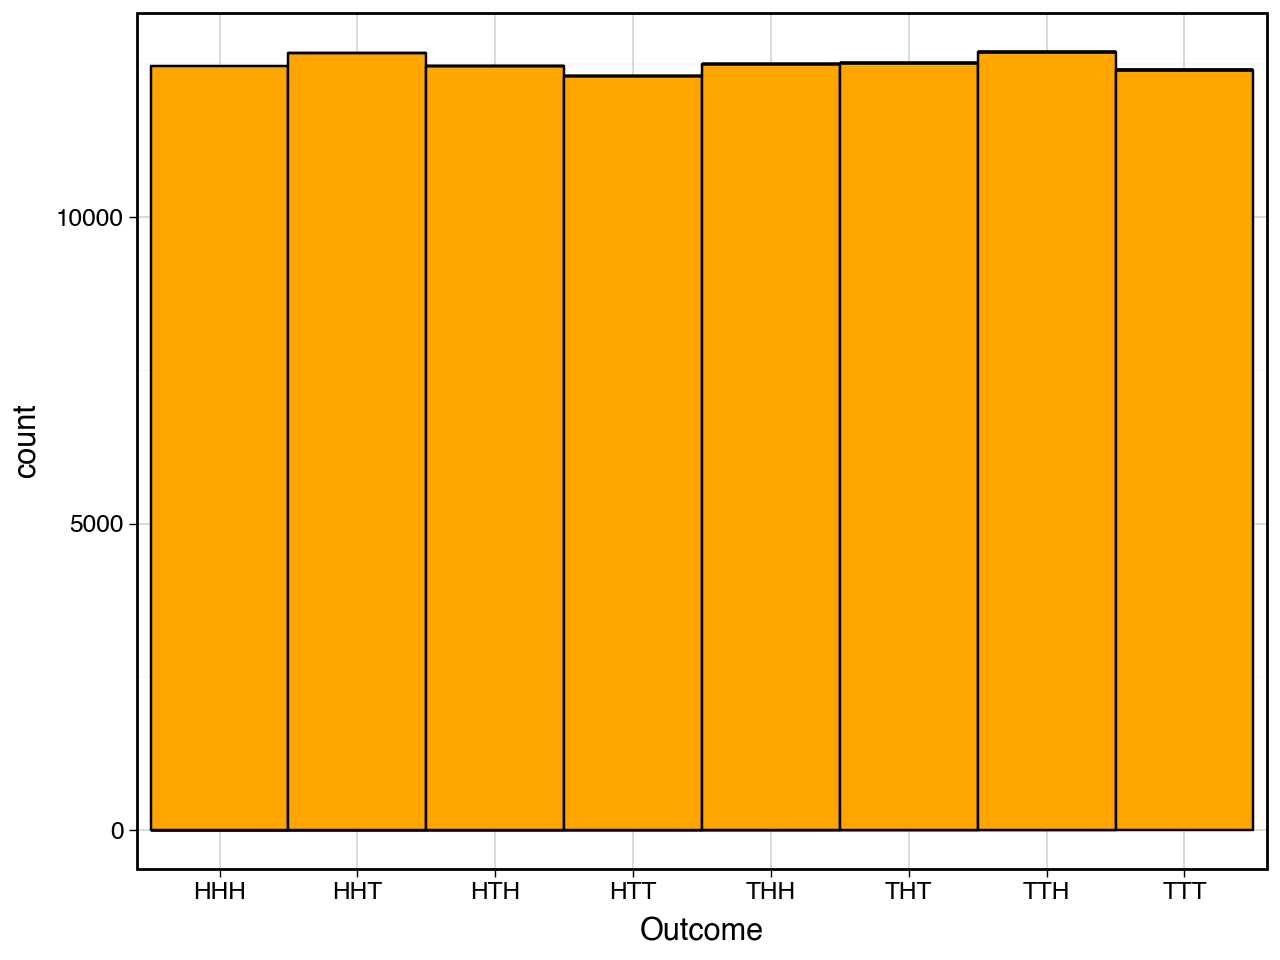

In [15]:
(
    ggplot(df_coins, mapping=aes(x="Outcome"))
    + geom_histogram(binwidth=1, fill="orange", color="black")
    + theme_linedraw()
)

In [17]:
outcome_counts = df_coins['Outcome'].value_counts()
df_coins = pd.merge(df_coins, outcome_counts, on="Outcome", how="left")
df_coins = df_coins.drop_duplicates()
df_coins["probability"] = df_coins["count"] / sample_size
df_coins

,Outcome,count,probability
0,THT,12681,0.12681
1,HTH,12496,0.12496
3,TTH,12430,0.12430
4,HHT,12508,0.12508
5,HTT,12527,0.12527
7,THH,12505,0.12505
12,HHH,12491,0.12491
18,TTT,12362,0.12362


---

#### 4. O problema de Monty Hall e o problema dos aniversários são frequentemente estudados em contextos de teoria das probabilidades devido à ua natureza intrigante e contraintuitiva, que desafia a intuição inicial. Ambos os problemas envolvem situações em que a probabilidade aparente de um evento pode ser enganosa e contraintuitiva, levando muitas pessoas a tirarem conclusões incorretas. Leia a Seção 13.7 em [65] para explorar os dois problemas, e descubra como esses desafios podem ser abordados empiricamente usando a técnica de Monte Carlo. Para verificar se os resultados das simulaçõoes (stick, switch e results) seguem uma distribuição normal, faça um um histogram e um gráfico quantil-quantil (QQ-plot) com a distribuição normal para cada resultado. Use a função ggplot.